### Homework 3
Author: Michael Busch

Collaborators: Alex, Hsiang-Chih, Bingjie

In [28]:
# Import standard python scientific packages.
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from __future__ import division

In [29]:
# Global Constants
h = 4.136e-15 # Planck constant in eV s
kb = 8.617e-5 # Boltzmann constant in eV / K
eV_to_joules = 1.602e-19 # eV to joules conversion factor
c_ang = 3e18 # speed of light in Angstroms

# Function Alex wrote to convert to eV
def energy_in_eV(x, opt='lambda'):
    if opt == 'lambda':
        return h * c_ang / x
    elif opt == 'nu':
        return h * x

lbl_ft_sz, title_ft_sz = 14, 20 # label and title font sizes

#### Problem 1

Using the atomic data in Table 2.8 of the notes, compute and plot the [NII]
I[5755]/I[6548+6583] line ratio as a function of temperature in the range 5000 – 20000 K
for two cases
(a) the limit of small density, ne, where most ions are in the ground state and the effects
of collisional de-excitation may be neglected
(b) the limit of very high density, where the level populations are in LTE. Adopt the
summed Einstein A-coefficients in Table 2.8 from my notes (rightmost column; you may
assume that the decay of 1
S0 leads exclusively to 1
D2)
Below roughly what electron density does case (a) apply? Above roughly what density
does case (b) apply.

We can assume at low density $\left( n_e \ll 10^5 \ \textsf{cm}^{-3} \right)$ that collisional de-excitation is negligible so that the line intensity ratio $I[5755]/I[6548 + 6583]$ is (keeping in mind that $[\rm{N}II] \lambda 5755$ is a $^1 D \rightarrow ^1 S$ transition and $[\rm{N}II] \lambda 6548+6583$ are $^1 S \rightarrow ^3 P$ transitions)

$$\frac{I[5755]}{I[6548 + 6583]} = \frac{A_{^1 D, ^1 S}}{A_{^1 D, ^1 S} + A_{^3 P, ^1 D}} \frac{\Omega \left(^3 P, ^1 S \right)}{\Omega \left( ^3 P, ^1 D \right)} \frac{E \left(^3 P, ^1 D\right)}{E \left(^1 D, ^1 S\right)} \exp \left( \left( -E \left(^1 S \right) + E \left( ^1 D \right) \right) \ / \ kT \right),$$

(see pg. 210 in Draine). For very high density regions in LTE, we can use eq. 18.8 from Draine:

$$\frac{I[5755]}{I[6548 + 6583]} = \frac{g_{^1 D, ^1 S} A_{^1 D, ^1 S} E\left(^1 D, ^1 S \right)}{g_{^3 P, ^1 D} A_{^3 P, ^1 D} E \left( ^3 P, ^1 D \right)} \exp \left( \left( - E \left(^1 S \right) + E \left( ^1 D \right) \right) \ / \ kT \right). $$

The critical density separates the low and high density regimes (see pg. 20 [here](http://www.astronomy.ohio-state.edu/~pogge/Ast871/Notes/Ionized.pdf)):

$$ n_{crit} = \frac{A_{ul}}{q_{ul}}, $$

where $A_{ul}$ is the Einstein A coefficient for the transition between upper and lower levels, and $q_{ul}$ is the de-excitation rate between upper and lower levels. 

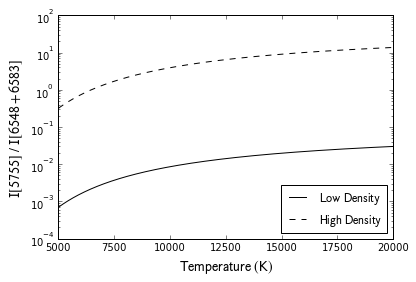

In [30]:
# Einstein A coefficients - from the lecture notes.
A_1d_1s, A_3p_1d = 1.1, 4e-3
# Effective Collision Strengths - from the lecture notes.
omega_3p_1s, omega_3p_1d = 0.36, 2.99

# For the ratio of energies, we can find a weighted ratio of wavelengths.
A_1d_3p2, A_1d_3p1 = 3e-3, 1e-3
weight_wavelength = (A_1d_3p2 * 6583 + A_1d_3p1 * 6548) / (A_1d_3p2 + A_1d_3p1)

# Therefore, we take the energy ratio to be:
e_ratio = 5755 / weight_wavelength

# Range of x-axis temperatures, in K.
temps = np.linspace(5000, 20000, 501)

# Calculating the NII line for low-density limit.
n2_line_ratio_small_density = (A_1d_1s / (A_1d_1s + A_3p_1d)) \
    * (omega_3p_1s / omega_3p_1d) * e_ratio * np.exp((- energy_in_eV(3063) + energy_in_eV(weight_wavelength)) / (kb * temps))

# Calculating the NII line for high-density limit.
g_1d_1s, g_3p_1d = 2 * 0 + 1, 2 * 2 + 1 # degeneracies
n2_line_ratio_high_denisty = (g_1d_1s / g_3p_1d) * (A_1d_1s / A_3p_1d) * e_ratio \
    * np.exp((- energy_in_eV(3063) + energy_in_eV(weight_wavelength)) / (kb * temps))
    
# Plotting our results.
plt.semilogy(temps, n2_line_ratio_small_density, color='k', label=r'$\rm{Low \ Density}$')
plt.semilogy(temps, n2_line_ratio_high_denisty, color='k', linestyle='--', label=r'$\rm{High \ Density}$')
plt.ylabel(r'$\rm{I}[5755] \ / \ \rm{I}[6548 + 6583]$', size=lbl_ft_sz)
plt.xlabel(r'$\rm{Temperature \ (K)}$', size=lbl_ft_sz)
plt.xlim(5000, 20000)
plt.xticks(np.linspace(5000, 20000, 7))
plt.legend(loc='best')
plt.show()

In [31]:
# N_crit = A_2_1 / q_2_1
g_1d_3p = 5
omega_1d_3p = 2.99
A_1d_3p = 4e-3
q_1d_3p = 8.629e-8 * omega_1d_3p / g_1d_3p

g_1s_3p = 1
omega_1s_3p = 0.36
A_1s_3p = 1.1
q_1s_3p = 8.629e-8 * omega_1s_3p / g_1s_3p

def n_crit(A, q):
    return A/q

print ('Critical density for 3P transition:', '%.3e' % n_crit(A_1d_3p, q_1d_3p))
print ('Critical density for 1D transition:', '%.3e' % n_crit(A_1s_3p, q_1s_3p))

Critical density for 3P transition: 7.752e+04
Critical density for 1D transition: 3.541e+07


From ${}^3P$ to higher levels: N_crit = 7.7e+4 $cm^{-3}$

From ${}^1D$ to higher levels: N_crit = 3.5e+7 $cm^{-3}$

#### Problem 2

The equivalent width for an absorption line, Wλ , is actually a function of two unknown
astrophysical parameters: the column density of the absorbing ion, N, and the Doppler
parameter, b. If only spectra of low resolution are available, then b cannot be determined
directly. In this problem, you will see how observations of two absorption lines
originating in the same lower state (but with different upward oscillator strengths) can be
used to solve for the two unknown astrophysical parameters.

Consider absorption by the CIV doublet, a pair of dipole allowed transitions which
share a single state (the ground state) as their lower level. The CIV doublet is often
observed in the spectra of quasistellar objects

(a) Given that the ratio of upward oscillator strengths for the 1548 and 1550 Angstrom
transitions in this doublet is 2 : 1, use Table 3.1 from my notes to compute how the
“doublet ratio” of equivalent widths
D.R. = Wλ (1548 Α) / Wλ (1550 Α)
depends upon the optical depth at the center of the (weaker) 1550 A line (for an assumed
Gaussian line profile). Tabulate your results and sketch a graph showing the dependence.
(b) Suppose a particular object shows 1548 and 1550 A absorption lines with equivalent
widths 132 and 98.6 milliAngstrom respectively. Compute the column density of C3+ ions
along the line-of-sight, N(C3+), and the Doppler parameter, b, taking the oscillator
strength of the 1550 Angstrom line to be 0.1
(c) Table 3.1 assumes a purely Maxwellian line profile and does not take
account of the “damping wings” that are important at large optical depth. Discuss how
you expect the presence of the damping wings to affect the doublet ratio at large N(C3+),
and sketch a modified plot of the doublet ratio versus optical depth that includes the
effect of the damping wings. Consider whether your solution for N(C3+) and b is a unique
one in light of that effect.

Relevant formulae/tables are in the Lecture 8 notes. For a Gaussian profile, we can assume the lines are optically thick so that 

$$ \frac{W_{\lambda}}{\lambda} = \frac{\lambda}{c} \int_{-\infty}^{\infty} d\nu \ \left[ 1 - \exp \left( - \tau_0 \ \exp \left(x^2 \right) \right) \right] \\ = \frac{2 \lambda}{c} \Delta \nu_D \int_{-\infty}^{\infty} d\nu \ \left[ 1 - \exp \left( - \tau_0 \ \exp \left(x^2 \right) \right) \right] \\ = \frac{2 b}{c} F\left(\tau_0\right),$$

following the convention on pg. 5 of the notes. 

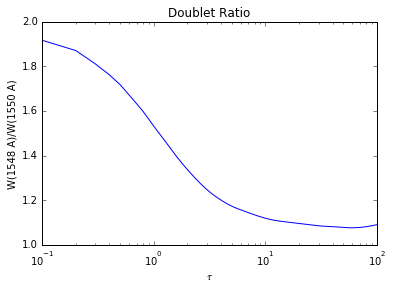

In [38]:
# For part a, assume the doppler parameter is constant for both. We also know that T_0 depends on the
# upward oscillator strength, thus T_2 = 2 * T_1.

from scipy.interpolate import interp1d

lambda_1 = 1548
lambda_2 = 1550

# The table from the lecture notes, as Python arrays.
T_1 = [0, 0.10, 0.20, 0.30, 
           0.40, 0.50, 0.60, 0.80, 
           1.0, 1.2, 1.4, 1.6, 2.0, 
           3.0, 4.0, 6.0, 10, 20, 30, 
           40, 60, 100, 1000, 10000]

F = [0.0, 0.086, 0.165, 0.240, 
        0.309, 0.374, 0.435, 0.545, 
        0.643, 0.728, 0.804, 0.872, 
        0.986, 1.188, 1.320, 1.483, 
        1.66, 1.86, 1.97, 2.04, 
        2.14, 2.26, 2.73, 3.12]

# We choose to graph our own curve-of-growth model using scipy and interpolate between the given tau and F values in the table.
def curve_of_growth(T):
    model = interp1d(T_1, F, kind='cubic')
    return model(T)

# Interpolate the curve_of_growth using scipy.interpolate.interp1d.
model = curve_of_growth(T_1)

# Creating our x-axis.
taus_list = np.linspace(0.1, 100, 1000)

# Plotting our results.
plt.semilogx(taus_list, lambda_1/lambda_2 * curve_of_growth(2*taus_list)/curve_of_growth(taus_list))
plt.ylabel('W(1548 A)/W(1550 A)')
plt.xlabel(r'$\tau$')
plt.title('Doublet Ratio')

In [33]:
# If we are given a ratio W(1548)/W(1550), we can look
# at the graph and determine the Tau.
doublet_ratio = lambda_1/lambda_2 * curve_of_growth(2*taus_list)/curve_of_growth(taus_list)
# Check what Tau is for this ratio.
print ('Tau is roughly, via our interpolation:', doublet_ratio[1.33])

print ('Ratio of W(1548)/W1(1550):', 132/98.6)
print ('Tau for this ratio is roughly: 1.8 - 2')

Tau is roughly, via our interpolation: 1.87031085044
Ratio of W(1548)/W1(1550): 1.3387423935091278
Tau for this ratio is roughly: 1.8 - 2


C:\Users\Michael\Anaconda\lib\site-packages\ipykernel\__main__.py:5: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [34]:
# Find F(T)_1550.
print ('F_1550(1.87):', '%.3e' % curve_of_growth(1.87))

# Find_F(T)_1548
print ('F_1548(1.87):', '%.3e' % curve_of_growth(2*1.87))

F_1550(1.87): 9.517e-01
F_1548(1.87): 1.290e+00


In [35]:
# Find doppler parameter 'b'
import astropy.units as u
import astropy.constants as c

b_1548= (0.132/1548) * (1/1.29) * (c.c/2)
print (b_1548.to(u.km/u.s))

b_1550 = (0.0986/1550) * (1/0.95) * (c.c/2)
print (b_1550.to(u.km/u.s))

print('We take b to be 10 km/s in order to find the column density.')

9.908410065500872 km / s
10.037194009779286 km / s
We take b to be 10 km/s in order to find the column density.


In [36]:
import astropy.units as u
import astropy.constants as c
# Find the column density, 1550
frequency = (c.c/(1550.*u.Angstrom))
oscillator_strength = 0.1
tau = 1.87
#e = 4.8e-10 # in Cgs units
#m_e = 9.109e-28 # in g
#c = 2.998e10 # Speed of light in cm/s
b_1550 = 10 * u.km / u.s


def delta_nu(b, nu):
    return (b/c.c) * nu

def column_density(b, nu, tau):
    return (tau * np.pi**(1/2) * delta_nu(b_1550, frequency)) / ((np.pi * c.e.esu**2)/(c.m_e * c.c) * oscillator_strength) 

tmp = column_density(b_1550, frequency, tau)
print('The column density is:', tmp.to(1/u.cm**2))

#print b_1550/c
#print delta_nu(b_1550, frequency)
#print (tau * m_e * c.c)/(np.pi * e**2)
#print (tau * m_e * c.c)/(np.pi * e**2) * 10 * np.sqrt(np.pi) * delta_nu(b_1550, frequency)

The column density is: 80571690705552.78 1 / cm2


# Part C: 
Consider Case 3, optically-thick Lorentzian line. The equivalent width ratio increases as square root for greater column densities.

Consider graph 9.3, 9.2 in B. Draine. The line broadens for different b.

#### Problem 3

Compute the densities of Ca, Ca+ and Ca++ ions expected within an unshielded HI
cloud of density 100 H nuclei per cm3
. Adopt the solar abundance given in Table 1 of the
notes and the depletion given in Table 2.12. You may assume that the rate coefficients
for radiative recombination to Ca and Ca+ are respectively 2 x 10–11 and 5 x 10–11
cm3 s
–1
at the temperature of an atomic cloud. Use the photoionization rates given in Table 3.2 of
the notes, and assume that electrons are contributed entirely by the elements C, Si, S, Mg,
and Fe, all of which are singly ionized in the gas-phase. 

Relevant equations are on pg. 10 of the Lecture 8 notes.

In [37]:
# We assume that the stellar abundances for the materials
# are given from Table 1, lecture 2.

n_H = 100 # Problem gives cloud has 100 H/cm^3.

def rel_H(x):
    # Relative abundance to hydrogen (which is defined as 12).
    return 10**(x - 12)

c_ab = rel_H(8.39)
si_ab = rel_H(7.51)
fe_ab = rel_H(7.45)
s_ab = rel_H(7.14)
mg_ab = rel_H(7.53)
ca_ab = rel_H(6.31)

# Assuming logarithmic solar depletion factors from table 2.12:

c_de = 10**(-0.47)
si_de = 10**(-1.31)
mg_de = 10**(-0.81)
s_de = 10**(0.23)
fe_de = 10**(-2.39)

# Finding Ca abundnace.
N_ca = n_H * ca_ab
print ('Ca Number Density:', '%.3e' % N_ca)

# Return electron abundance.
def e_a(ab, de):
    return ab * de

# Total electron abundance (tea): arising from C, Si, Fe, S, Mg.
tea = e_a(c_ab, c_de) + e_a(si_ab, si_de) + e_a(fe_ab, fe_de) + e_a(s_ab, s_de) + e_a(mg_ab, mg_de)
print ('Total electron abundance:', '%.3e' % tea)

# Calculate number density of electrons.
n_e = tea * n_H
print ('Electron Number Density:', '%.3e' % n_e)

# Ionization and recombination rates for Ca, Ca+
Ca_ion = 2.8e-10
Ca_plus_ion = 0.018e-10
Ca_rec = 2e-11
Ca_plus_rec = 5e-11

N_Ca_plus = (Ca_ion * N_ca) / (Ca_rec * n_e)
print ('Ca+ Number Density:', '%.3e' % N_Ca_plus)

N_Ca_plus_plus = (Ca_plus_ion * N_ca) / (Ca_plus_rec * n_e)
print ('Ca++ Number Density:', '%.3e' % N_Ca_plus_plus)


Ca Number Density: 2.042e-04
Total electron abundance: 1.136e-04
Electron Number Density: 1.136e-02
Ca+ Number Density: 2.517e-01
Ca++ Number Density: 6.472e-04
